## Code Example

Tested with Python 3.12.0

In [2]:
import pandas as pd
import numpy as np #for numerical and vector operations

from sklearn import metrics #metrics
from sklearn.metrics import classification_report #for F1 score and other metrics
from sklearn.metrics import confusion_matrix #for confusion matrix
#from sklearn.metrics import roc_curve, roc_auc_score #ROC and AUC scores
from sklearn.metrics import ConfusionMatrixDisplay #for plotting confusion matrix
from sklearn.preprocessing import OrdinalEncoder

# Importing machine learning tools for preprocessing
from sklearn.model_selection import train_test_split #for splitting the data into training and test sets
from sklearn.preprocessing import StandardScaler #for feature scaling
from sklearn.ensemble import RandomForestClassifier #random forest classifier


In [31]:
data=pd.read_csv('data.csv',index_col=0)
data.reset_index(drop=True) # Drop index from import and return to continuous index

/tmp/ipykernel_5675/2003343006.py:1: DtypeWarning: Columns (157) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('data.csv',index_col=0)


,time,Rapid_traverse_button,Door_open,LED_Chip_flushing,LED_Coolant,LED_Spindle_flushing,Program_Idle,Rapid_traverse_button_Spindle,Chip_flushing_button,Spindle_flushing_button,Door_status_locked,X-axis_feed,X-axis_position_MCS,X-axis_position_WCS,X-axis_position_error,Y-axis_feed,Y-axis_position_MCS,Y-axis_position_WCS,Y-axis_position_error,Z-axis_feed,Z-axis_position_MCS,Z-axis_position_WCS,Z-axis_position_error,B-axis_feed,B-axis_position_MCS,B-axis_position_WCS,B-axis_position_error,Spindle_angular_velocity,Spindle_position_MCS,Spindle_position_WCS,Spindle_position_error,C-axis_feed,C-axis_position_MCS,C-axis_position_WCS,C-axis_position_error,Tool_magazine_feed,Tool_magazine_position_MCS,Tool_magazine_position_WCS,Tool_magazine_position_error,Operation_mode,Cycle_time_program,Total_running_time_NC_program,Net_running_time_program,Program_status,Line_Content,Program_line_number,Program_path,Tool_ID,Feed_override,Spindle_speed,Spindle_smoothed_current,Spindle_smoothed_torque,Spindle_smoothed_modulation_depth,Spindle_motor_temperature,Spindle_smoothed_active_power,Spindle_smoothed_intermediate_circuit_voltage,Spindle_smoothed_speed,X_Axis_smoothed_current,X_Axis_smoothed_torque,X_Axis_smoothed_modulation_depth,X_Axis_motor_temperature,X_Axis_smoothed_active_power,X_Axis_smoothed_intermediate_circuit_voltage,X_Axis_smoothed_speed,Z_Axis_smoothed_current,Z_Axis_smoothed_torque,Z_Axis_smoothed_modulation_depth,Z_Axis_Motor_temperature,Z_Axis_smoothed_active_power,Z_Axis_smoothed_intermediate_circuit_voltage,Z_Axis_smoothed_speed,Y_Axis_smoothed_current,Y_Axis_smoothed_torque,Y_Axis_smoothed_modulation_depth,Y_Axis_Motor_temperature,Y_Axis_smoothed_active_power,Y_Axis_smoothed_intermediate_circuit_voltage,Y_Axis_smoothed_speed,ToolChange_smoothed_current_value,ToolChange_smoothed_torque,ToolChange_smoothed_modulation_depth,ToolChange_Motor_temperature,ToolChange_smoothed_active_power,ToolChange_smoothed_intermediate_circuit_voltage,ToolChange_smoothed_speed_value,B_Axis_smoothed_current,B_Axis_smoothed_torque,B_Axis_smoothed_modulation_depth,B_Axis_Motor_temperature,B_Axis_smoothed_active_power_value,B_Axis_smoothed_intermediate_circuit_voltage,B_Axis_smoothed_speed,C_Axis_smoothed_current,C_Axis_smoothed_torque_value,C_Axis_smoothed_modulation_depth,C_Axis_Motor_temperature,C_Axis_smoothed_active_power,C_Axis_smoothed_intermediate_circuit_voltage,C_Axis_smoothed_speed,Magazine_number_Place_13,Magazine_position_Place_13,Tool_ID_Magazine_Place_13,Tool_number_Magazine_Place_13,Magazine_number_Place_15,Magazine_position_Place_15,Tool_ID_Magazine_Place_15,Tool_number_Magazine_Place_15,Magazine_number_Place_17,Magazine_position_Place_17,Tool_ID_Magazine_Place_17,Tool_number_Magazine_Place_17,Magazine_number_Place_2,Magazine_position_Place_2,Tool_ID_Magazine_Place_2,Tool_number_Magazine_Place_2,Magazine_number_Place_4,Magazine_position_Place_4,Tool_ID_Magazine_Place_4,Tool_number_Magazine_Place_4,Magazine_number_Place_43,Magazine_position_Place_43,Tool_ID_Magazine_Place_43,Tool_number_Magazine_Place_43,Tool_ID_Magazine_Place_49,smoothed_DC_voltage_Drive4,Magazine_number_Place_5,Magazine_position_Place_5,Tool_ID_Magazine_Place_5,Tool_number_Magazine_Place_5,Magazine_number_Place_52,Magazine_position_Place_52,Tool_ID_Magazine_Place_52,Tool_number_Magazine_Place_52,Magazine_number_Place_8,Magazine_position_Place_8,Tool_ID_Magazine_Place_8,Tool_number_Magazine_Place_8,Magazine_number_Place_9,Magazine_position_Place_9,Tool_ID_Magazine_Place_9,Tool_number_Magazine_Place_9,Magazine_9998_status,Magazine_9998_number_Place_1,Magazine_9998_position_Place_1,Tool_ID_Magazine_9998_Place_1,Tool_number_Magazine_9998_Place_1,Magazine_9998_number_Place_2,Magazine_9998_position_Place_2,Tool_ID_Magazine_9998_Place_2,Tool_number_Magazine_9998_Place_2,Magazine_9998_position_Place_3,Tool_ID_Magazine_9998_Place_3,Tool_number_Magazine_9998_Place_3,Magazine_9999_status,Magazine_9999_number_Place_1,Magazine_9999_position_Place_1,Tool_ID_Magazine_9999_Place_1,To

In [32]:
data.head()

,time,Rapid_traverse_button,Door_open,LED_Chip_flushing,LED_Coolant,LED_Spindle_flushing,Program_Idle,Rapid_traverse_button_Spindle,Chip_flushing_button,Spindle_flushing_button,Door_status_locked,X-axis_feed,X-axis_position_MCS,X-axis_position_WCS,X-axis_position_error,Y-axis_feed,Y-axis_position_MCS,Y-axis_position_WCS,Y-axis_position_error,Z-axis_feed,Z-axis_position_MCS,Z-axis_position_WCS,Z-axis_position_error,B-axis_feed,B-axis_position_MCS,B-axis_position_WCS,B-axis_position_error,Spindle_angular_velocity,Spindle_position_MCS,Spindle_position_WCS,Spindle_position_error,C-axis_feed,C-axis_position_MCS,C-axis_position_WCS,C-axis_position_error,Tool_magazine_feed,Tool_magazine_position_MCS,Tool_magazine_position_WCS,Tool_magazine_position_error,Operation_mode,Cycle_time_program,Total_running_time_NC_program,Net_running_time_program,Program_status,Line_Content,Program_line_number,Program_path,Tool_ID,Feed_override,Spindle_speed,Spindle_smoothed_current,Spindle_smoothed_torque,Spindle_smoothed_modulation_depth,Spindle_motor_temperature,Spindle_smoothed_active_power,Spindle_smoothed_intermediate_circuit_voltage,Spindle_smoothed_speed,X_Axis_smoothed_current,X_Axis_smoothed_torque,X_Axis_smoothed_modulation_depth,X_Axis_motor_temperature,X_Axis_smoothed_active_power,X_Axis_smoothed_intermediate_circuit_voltage,X_Axis_smoothed_speed,Z_Axis_smoothed_current,Z_Axis_smoothed_torque,Z_Axis_smoothed_modulation_depth,Z_Axis_Motor_temperature,Z_Axis_smoothed_active_power,Z_Axis_smoothed_intermediate_circuit_voltage,Z_Axis_smoothed_speed,Y_Axis_smoothed_current,Y_Axis_smoothed_torque,Y_Axis_smoothed_modulation_depth,Y_Axis_Motor_temperature,Y_Axis_smoothed_active_power,Y_Axis_smoothed_intermediate_circuit_voltage,Y_Axis_smoothed_speed,ToolChange_smoothed_current_value,ToolChange_smoothed_torque,ToolChange_smoothed_modulation_depth,ToolChange_Motor_temperature,ToolChange_smoothed_active_power,ToolChange_smoothed_intermediate_circuit_voltage,ToolChange_smoothed_speed_value,B_Axis_smoothed_current,B_Axis_smoothed_torque,B_Axis_smoothed_modulation_depth,B_Axis_Motor_temperature,B_Axis_smoothed_active_power_value,B_Axis_smoothed_intermediate_circuit_voltage,B_Axis_smoothed_speed,C_Axis_smoothed_current,C_Axis_smoothed_torque_value,C_Axis_smoothed_modulation_depth,C_Axis_Motor_temperature,C_Axis_smoothed_active_power,C_Axis_smoothed_intermediate_circuit_voltage,C_Axis_smoothed_speed,Magazine_number_Place_13,Magazine_position_Place_13,Tool_ID_Magazine_Place_13,Tool_number_Magazine_Place_13,Magazine_number_Place_15,Magazine_position_Place_15,Tool_ID_Magazine_Place_15,Tool_number_Magazine_Place_15,Magazine_number_Place_17,Magazine_position_Place_17,Tool_ID_Magazine_Place_17,Tool_number_Magazine_Place_17,Magazine_number_Place_2,Magazine_position_Place_2,Tool_ID_Magazine_Place_2,Tool_number_Magazine_Place_2,Magazine_number_Place_4,Magazine_position_Place_4,Tool_ID_Magazine_Place_4,Tool_number_Magazine_Place_4,Magazine_number_Place_43,Magazine_position_Place_43,Tool_ID_Magazine_Place_43,Tool_number_Magazine_Place_43,Tool_ID_Magazine_Place_49,smoothed_DC_voltage_Drive4,Magazine_number_Place_5,Magazine_position_Place_5,Tool_ID_Magazine_Place_5,Tool_number_Magazine_Place_5,Magazine_number_Place_52,Magazine_position_Place_52,Tool_ID_Magazine_Place_52,Tool_number_Magazine_Place_52,Magazine_number_Place_8,Magazine_position_Place_8,Tool_ID_Magazine_Place_8,Tool_number_Magazine_Place_8,Magazine_number_Place_9,Magazine_position_Place_9,Tool_ID_Magazine_Place_9,Tool_number_Magazine_Place_9,Magazine_9998_status,Magazine_9998_number_Place_1,Magazine_9998_position_Place_1,Tool_ID_Magazine_9998_Place_1,Tool_number_Magazine_9998_Place_1,Magazine_9998_number_Place_2,Magazine_9998_position_Place_2,Tool_ID_Magazine_9998_Place_2,Tool_number_Magazine_9998_Place_2,Magazine_9998_position_Place_3,Tool_ID_Magazine_9998_Place_3,Tool_number_Magazine_9998_Place_3,Magazine_9999_status,Magazine_9999_number_Place_1,Magazine_9999_position_Place_1,Tool_ID_Magazine_9999_Place_1,To

In [33]:
# drop columns
columns_to_drop = ['time', 'Line_Content','Program_path','Label_01','Label_02','Label_04','Label_05','Label_06','Label_07','Label_08','Label_09','Label_10']  # drop not used labels and features
df = data.drop(columns=columns_to_drop)

In [34]:
#change bool columns to integer
bool_columns = ['Door_open', 'LED_Chip_flushing','LED_Coolant','LED_Spindle_flushing','Program_Idle','Rapid_traverse_button_Spindle','Chip_flushing_button','Spindle_flushing_button','Door_status_locked','Program_Start','Program_Stop']  # Replace with actual boolean column names
df[bool_columns] = df[bool_columns].astype(int)

In [35]:
# Apply Ordinal Encoding to categorical columns
categorical_columns = ['Tool_ID','Tool_ID_Magazine_Place_13', 'Tool_ID_Magazine_Place_15','Tool_ID_Magazine_Place_17','Tool_ID_Magazine_Place_2','Tool_ID_Magazine_Place_4','Tool_ID_Magazine_Place_43','Tool_ID_Magazine_Place_5','Tool_ID_Magazine_Place_52','Tool_ID_Magazine_Place_8','Tool_ID_Magazine_Place_9','Tool_ID_Magazine_9998_Place_1','Tool_ID_Magazine_9998_Place_2','Tool_ID_Magazine_9998_Place_3','Tool_ID_Magazine_9999_Place_1','Tool_ID_Magazine_Place_7','Tool_ID_Magazine_Place_6','Tool_ID_Magazine_Place_49']  # Replace with actual categorical column names
encoder = OrdinalEncoder()
df[categorical_columns] = encoder.fit_transform(df[categorical_columns])

In [36]:
pd.set_option('display.max_columns', 500)
df.head()

,Rapid_traverse_button,Door_open,LED_Chip_flushing,LED_Coolant,LED_Spindle_flushing,Program_Idle,Rapid_traverse_button_Spindle,Chip_flushing_button,Spindle_flushing_button,Door_status_locked,X-axis_feed,X-axis_position_MCS,X-axis_position_WCS,X-axis_position_error,Y-axis_feed,Y-axis_position_MCS,Y-axis_position_WCS,Y-axis_position_error,Z-axis_feed,Z-axis_position_MCS,Z-axis_position_WCS,Z-axis_position_error,B-axis_feed,B-axis_position_MCS,B-axis_position_WCS,B-axis_position_error,Spindle_angular_velocity,Spindle_position_MCS,Spindle_position_WCS,Spindle_position_error,C-axis_feed,C-axis_position_MCS,C-axis_position_WCS,C-axis_position_error,Tool_magazine_feed,Tool_magazine_position_MCS,Tool_magazine_position_WCS,Tool_magazine_position_error,Operation_mode,Cycle_time_program,Total_running_time_NC_program,Net_running_time_program,Program_status,Program_line_number,Tool_ID,Feed_override,Spindle_speed,Spindle_smoothed_current,Spindle_smoothed_torque,Spindle_smoothed_modulation_depth,Spindle_motor_temperature,Spindle_smoothed_active_power,Spindle_smoothed_intermediate_circuit_voltage,Spindle_smoothed_speed,X_Axis_smoothed_current,X_Axis_smoothed_torque,X_Axis_smoothed_modulation_depth,X_Axis_motor_temperature,X_Axis_smoothed_active_power,X_Axis_smoothed_intermediate_circuit_voltage,X_Axis_smoothed_speed,Z_Axis_smoothed_current,Z_Axis_smoothed_torque,Z_Axis_smoothed_modulation_depth,Z_Axis_Motor_temperature,Z_Axis_smoothed_active_power,Z_Axis_smoothed_intermediate_circuit_voltage,Z_Axis_smoothed_speed,Y_Axis_smoothed_current,Y_Axis_smoothed_torque,Y_Axis_smoothed_modulation_depth,Y_Axis_Motor_temperature,Y_Axis_smoothed_active_power,Y_Axis_smoothed_intermediate_circuit_voltage,Y_Axis_smoothed_speed,ToolChange_smoothed_current_value,ToolChange_smoothed_torque,ToolChange_smoothed_modulation_depth,ToolChange_Motor_temperature,ToolChange_smoothed_active_power,ToolChange_smoothed_intermediate_circuit_voltage,ToolChange_smoothed_speed_value,B_Axis_smoothed_current,B_Axis_smoothed_torque,B_Axis_smoothed_modulation_depth,B_Axis_Motor_temperature,B_Axis_smoothed_active_power_value,B_Axis_smoothed_intermediate_circuit_voltage,B_Axis_smoothed_speed,C_Axis_smoothed_current,C_Axis_smoothed_torque_value,C_Axis_smoothed_modulation_depth,C_Axis_Motor_temperature,C_Axis_smoothed_active_power,C_Axis_smoothed_intermediate_circuit_voltage,C_Axis_smoothed_speed,Magazine_number_Place_13,Magazine_position_Place_13,Tool_ID_Magazine_Place_13,Tool_number_Magazine_Place_13,Magazine_number_Place_15,Magazine_position_Place_15,Tool_ID_Magazine_Place_15,Tool_number_Magazine_Place_15,Magazine_number_Place_17,Magazine_position_Place_17,Tool_ID_Magazine_Place_17,Tool_number_Magazine_Place_17,Magazine_number_Place_2,Magazine_position_Place_2,Tool_ID_Magazine_Place_2,Tool_number_Magazine_Place_2,Magazine_number_Place_4,Magazine_position_Place_4,Tool_ID_Magazine_Place_4,Tool_number_Magazine_Place_4,Magazine_number_Place_43,Magazine_position_Place_43,Tool_ID_Magazine_Place_43,Tool_number_Magazine_Place_43,Tool_ID_Magazine_Place_49,smoothed_DC_voltage_Drive4,Magazine_number_Place_5,Magazine_position_Place_5,Tool_ID_Magazine_Place_5,Tool_number_Magazine_Place_5,Magazine_number_Place_52,Magazine_position_Place_52,Tool_ID_Magazine_Place_52,Tool_number_Magazine_Place_52,Magazine_number_Place_8,Magazine_position_Place_8,Tool_ID_Magazine_Place_8,Tool_number_Magazine_Place_8,Magazine_number_Place_9,Magazine_position_Place_9,Tool_ID_Magazine_Place_9,Tool_number_Magazine_Place_9,Magazine_9998_status,Magazine_9998_number_Place_1,Magazine_9998_position_Place_1,Tool_ID_Magazine_9998_Place_1,Tool_number_Magazine_9998_Place_1,Magazine_9998_number_Place_2,Magazine_9998_position_Place_2,Tool_ID_Magazine_9998_Place_2,Tool_number_Magazine_9998_Place_2,Magazine_9998_position_Place_3,Tool_ID_Magazine_9998_Place_3,Tool_number_Magazine_9998_Place_3,Magazine_9999_status,Magazine_9999_number_Place_1,Magazine_9999_position_Place_1,Tool_ID_Magazine_9999_Place_1,Tool_number_Magazine_9999_Place_1

In [37]:
#fill NaN values with 0
df=df.fillna(0)

In [38]:
# Split data into features (X) and target (y)
X = df.drop('Label_03', axis=1)  
y = df['Label_03']

In [39]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# scale features
scaler = StandardScaler()
train_features = scaler.fit_transform(X_train)
test_features = scaler.transform(X_test)

In [41]:
# train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
#predict test set
y_pred=model.predict(X_test)

In [43]:
# look at metrics
report = classification_report(y_test, y_pred, output_dict=True)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7219
         1.0       1.00      0.99      1.00      3187

    accuracy                           1.00     10406
   macro avg       1.00      1.00      1.00     10406
weighted avg       1.00      1.00      1.00     10406



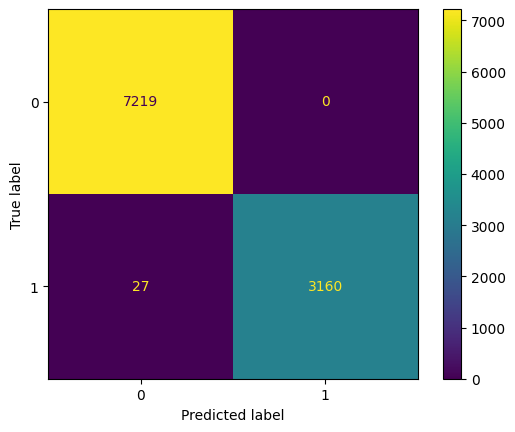

In [44]:
# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(2))
disp.plot()